# Setup

In [105]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('dark_background')
%matplotlib inline

# Book Examples

## Model Validation and Hyperparameters

In [106]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
x = wine.data
y = wine.target

# Create the model
model = KNeighborsClassifier(n_neighbors=2)
x1, x2, y1, y2 = train_test_split(x, y, random_state=5, train_size=0.7)
model.fit(x1, y1)
y2_model = model.predict(x2)

# Determine the accuracy score
print(accuracy_score(y2, y2_model))

0.6851851851851852


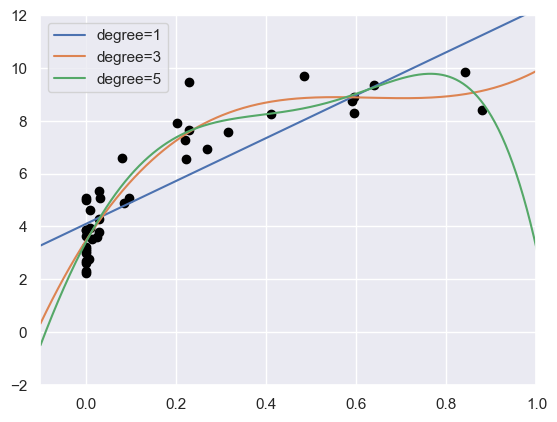

In [117]:
#Plot with several degree line of best fit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import seaborn; seaborn.set_theme()

def PolynomialRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# Create Data
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 4
    y = 10 - 1. / (X.ravel() + 0.15)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

X_test = np.linspace(-0.1, 1.2, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')
plt.show()

## Learning Curves

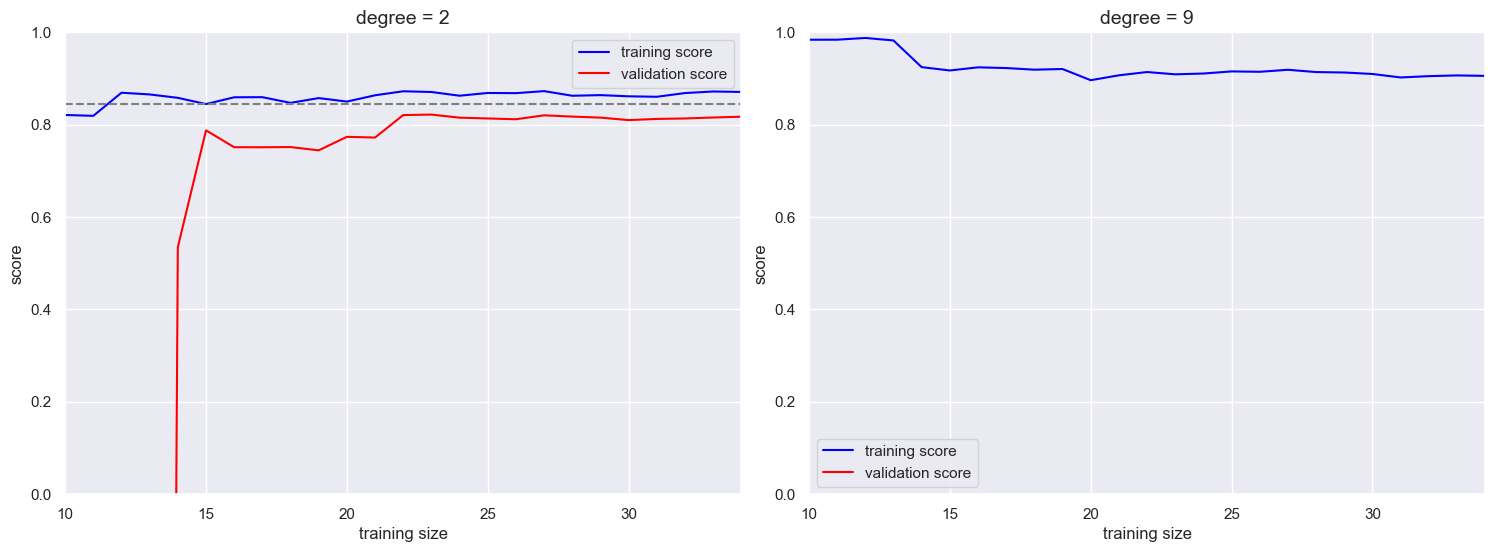

In [108]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

## Feature Engineering

In [119]:
from sklearn.feature_extraction import DictVectorizer
# Categorical Features

data = [
    {'price': 285000, 'rooms': 5, 'neighborhood': 'Cambridge'},
    {'price': 250000, 'rooms': 3, 'neighborhood': 'Honey Ridge'},
    {'price': 262000, 'rooms': 3, 'neighborhood': 'Sunset'},
    {'price': 231000, 'rooms': 4, 'neighborhood': 'Wildwood'}
]
# This ensures no neighborhood is unfairly favored. 
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     1,      0,      0,      0, 285000,      5],
       [     0,      1,      0,      0, 250000,      3],
       [     0,      0,      1,      0, 262000,      3],
       [     0,      0,      0,      1, 231000,      4]])

In [122]:
# Text Features

from sklearn.feature_extraction.text import TfidfVectorizer
data = ['potato of justice',
          'justice spud',
          'is a spud a potato']

vec = TfidfVectorizer()
X = vec.fit_transform(data)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,is,justice,of,potato,spud
0,0.000000,0.517856,0.680919,0.517856,0.000000
1,0.000000,0.707107,0.000000,0.000000,0.707107
2,0.680919,0.000000,0.000000,0.517856,0.517856


# Machine Learning: Supervised, Unsupervised Learning, and HOG 

## Supervised Machine Learning - Linear Regression

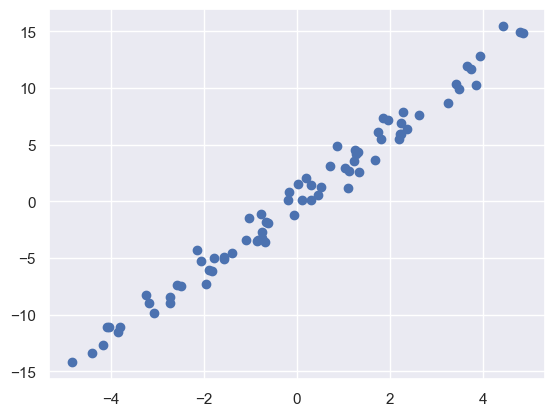

In [109]:
# Plot basic scatterplot
rng = np.random.RandomState(123)
x = 10 * rng.rand(75) - 5
y = x * 3 + rng.randn(75)
plt.scatter(x, y)
plt.show()

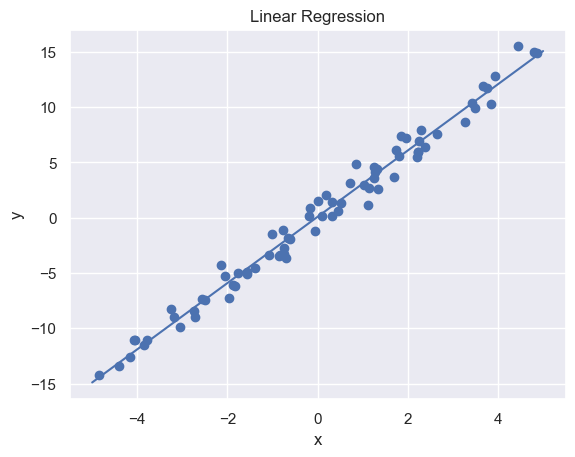

In [110]:
# Introducing Scikit-Learn
# What is Machine Learning
# Create model
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X, y)
xfit = np.linspace(-5, 5)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# Plot the scatter plot and the line of best fit
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.title("Linear Regression")   
plt.xlabel("x")                 
plt.ylabel("y")                 
plt.show()

In [111]:
# Regression data
print(f"Slope:      {model.coef_}\ny-intercept: {model.intercept_}")

Slope:      [2.99538529]
y-intercept: 0.08011381035205964


## Unsupervised Machine Learning - k-Means Clustering

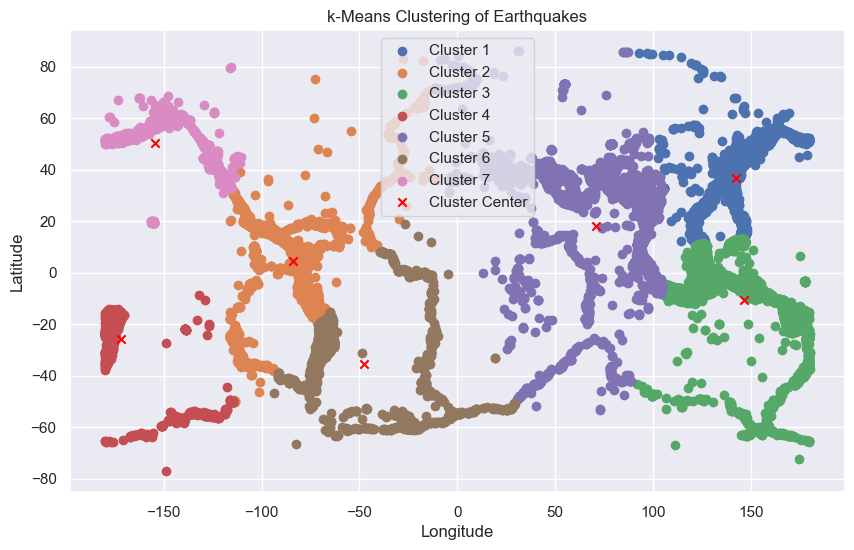

In [112]:
# k-Means Clustering 2-D

# Handles CSV data
data = pd.read_csv('earthquakes.csv')
x = data[['Latitude', 'Longitude']].values

# Set up kmeans
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
cCenters = kmeans.cluster_centers_

# Setup figure and plot clusters and centers
plt.figure(figsize=(10, 6))
for cLabel in range(7):
    plt.scatter(x[labels == cLabel, 1], x[labels == cLabel, 0], label=f'Cluster {cLabel + 1}')
plt.scatter(cCenters[:, 1], cCenters[:, 0], marker='x', color='red', label='Cluster Center')

# Labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('k-Means Clustering of Earthquakes')
plt.legend()
plt.grid(True)
plt.show()

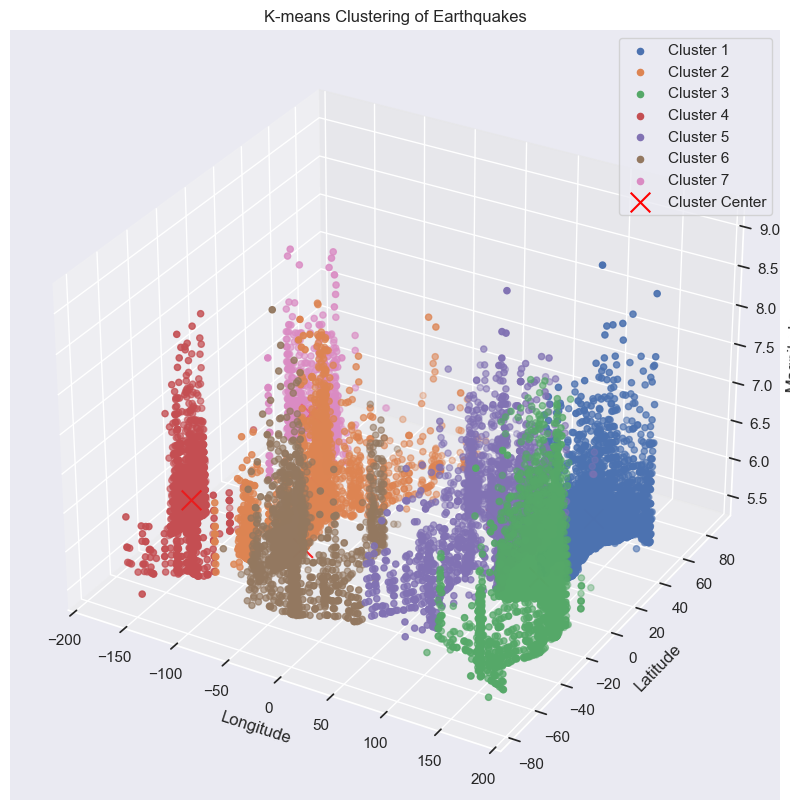

In [113]:
# k-Means Clustering 3-D

# Handle data
X = data[['Latitude', 'Longitude', 'Magnitude']].values

# Set up kmeans
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
cCenters = kmeans.cluster_centers_

# Setup 3-D plot and plot the scatter and the centers
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for cLabel in range(7):
    ax.scatter(X[labels == cLabel, 1], X[labels == cLabel, 0], X[labels == cLabel, 2], label=f'Cluster {cLabel + 1}')
ax.scatter(cCenters[:, 1], cCenters[:, 0], cCenters[:, 2], marker='x', color='red', s=200, label='Cluster Center')

# Labels, title, and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Magnitude')
ax.set_title('K-means Clustering of Earthquakes')
ax.legend()

# Show plot
plt.show()

## Sheep Recognition Using HOG

In [114]:
import cv2
import os
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [115]:
# Loads each image, transforms it to grey scale, and adds the image and the label argument to a list.
# Returns two list
def loadImages(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Use the cv2 library to load the image as grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None: 
            img_resized = cv2.resize(img, (64, 128))
            images.append(img_resized)
            labels.append(label)
    return images, labels

# Load images and label
pImages, pLabels = loadImages('Sheep', 'pos')
nImages, nLabels = loadImages('Spider', 'neg')

# Create lists with all data
images = pImages + nImages
labels = pLabels + nLabels

# Extract HOG data
hogData = []
for img in images:
    # Use the cells_per_block=(2, 2) arg due to error "ConvergenceWarning: Liblinear failed to converge, increase the number of iterations."
    data = hog(img, cells_per_block=(2, 2)) 
    hogData.append(data)


# Encode labels
lEncoder = LabelEncoder()
eLabels = lEncoder.fit_transform(labels)

# Train model
model = LinearSVC()
model.fit(hogData, eLabels)

# Evaluate model
prediction = model.predict(hogData)

Predictions for new image: neg
Image name Sheep1.jpg


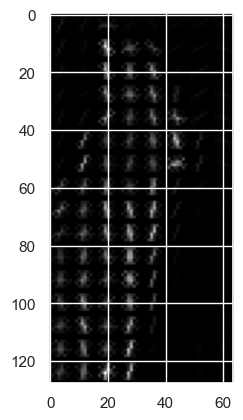

Predictions for new image: pos
Image name Sheep2.jpg


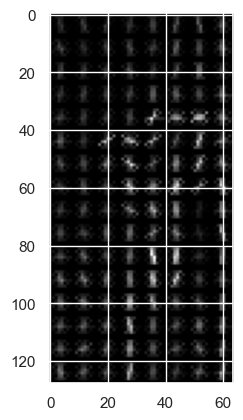

Predictions for new image: pos
Image name Sheep3.jpg


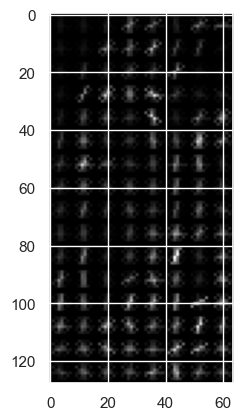

Predictions for new image: pos
Image name Sheep4.jpg


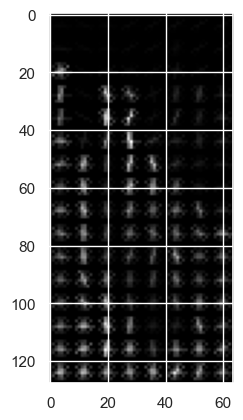

Predictions for new image: neg
Image name Sheep5.jpg


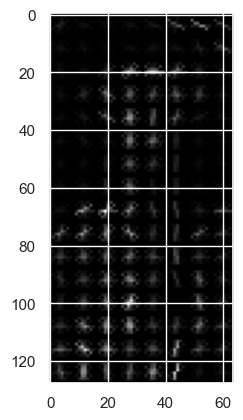

Predictions for new image: neg
Image name Spider1.jpg


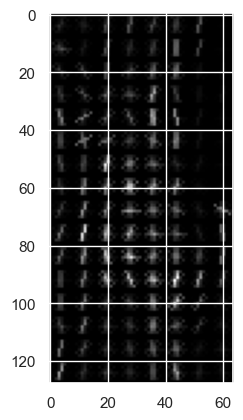

Predictions for new image: neg
Image name Spider2.jpg


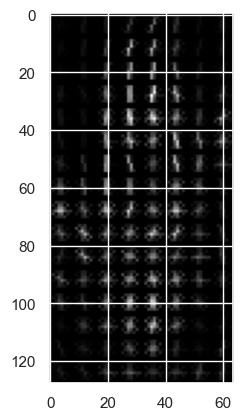

Predictions for new image: neg
Image name Spider3.jpg


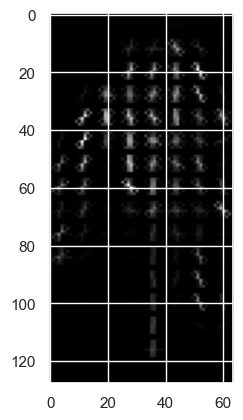

Predictions for new image: neg
Image name Spider4.jpg


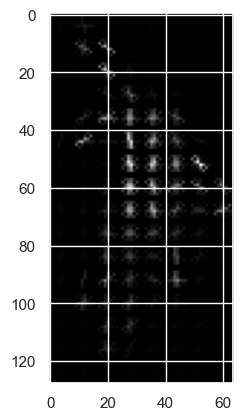

Predictions for new image: neg
Image name Spider5.jpg


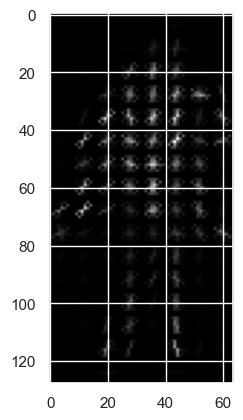

In [116]:
# Loads each image, transforms it to grey scale, and adds the image and the label argument to a list.
# Returns two list
def testModel(folder, model, label_encoder):
    testImages, testLabels = loadImages(folder, 'test') 
    hogData = []
    hogImgs = []
    for img in testImages:
        # Use the cells_per_block=(2, 2) arg due to error "ConvergenceWarning: Liblinear failed to converge, increase the number of iterations."
        data, hogImg = hog(img, cells_per_block=(2, 2), visualize=True) 
        hogData.append(data)
        hogImgs.append(hogImg)
    predictions = model.predict(hogData)
    decoded_predictions = label_encoder.inverse_transform(predictions)
    return decoded_predictions, hogImgs

# Puts all file names in a list
imgList = []
for filename in os.listdir('Test'):
    imgList.append(filename)

# Test the model on new images
predictions, hogImgs = testModel('Test', model, lEncoder)

# Predictions are around 80% correct
# Print the predictions for the new images
for x in range(10):
    plt.figure()
    print("Predictions for new image:", predictions[x])
    print("Image name", imgList[x])
    plt.imshow(hogImgs[x], cmap = 'gray')
    plt.show()